## Machine Learning

Melakukan prediksi Mobile Pricing berdasarkan Feature yang telah ditentukan


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
# berdasarkan link tersebut, https://www.leskompi.com/ukuran-jenis-resolusi-layar-hp/ paling kecil adalah 240, sehingga data yang nanti digunakan adalah ukuran smartphone rentan resolusinya dari 240 - 1960

data = df[df['px_height']>=240]
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
# berdasarkan link tersebut https://screensiz.es/ ukuran lebar paling kecil adalah 2, sehingga data yang nanti akan digunakan adalah spesikasi minimal hp yang memiliki lebar 2cm
datafix = data[data['sc_w']>=2]
datafix

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


## Data Preprocessing

In [5]:
datafix['price_range'].value_counts()


1    332
3    325
2    315
0    301
Name: price_range, dtype: int64

Karena dataset ini sudah balance, tidak perlu lagi dilakukan handling imbalance

## Splitting Data

In [6]:
from sklearn.model_selection import train_test_split


In [7]:
X = datafix.drop(columns='price_range')
y = datafix['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .80,random_state = 42)

## Machine Learning

### LogReg

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
modelLog = LogisticRegression()
modelLog.fit(X_train, y_train)
logreg_train = modelLog.predict(X_train)
logreg_test = modelLog.predict(X_test)

acclog_train = accuracy_score(y_train,logreg_train)
acclog_test = accuracy_score(y_test,logreg_test)

print('Model LogReg Accuracy Score Train:', acclog_train)
print('Model LogReg Accuracy Score Test:', acclog_test)


Model LogReg Accuracy Score Train: 0.637524557956778
Model LogReg Accuracy Score Test: 0.6039215686274509


### KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)

KNN_train = modelKNN.predict(X_train)
KNN_test = modelKNN.predict(X_test)

accKNN_train = accuracy_score(y_train,KNN_train)
accKNN_test = accuracy_score(y_test,KNN_test)
print('Model KNN Score :',accKNN_train)
print('Model KNN Score :',accKNN_test)


Model KNN Score : 0.9430255402750491
Model KNN Score : 0.9176470588235294


### Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)

RF_train = modelRF.predict(X_train)
RF_test = modelRF.predict(X_test)

accRF_train = accuracy_score(y_train,RF_train)
accRF_test = accuracy_score(y_test,RF_test)
print('Model RF Score :',accRF_train)
print('Model RF Score :',accRF_test)

Model RF Score : 1.0
Model RF Score : 0.8549019607843137


In [11]:
data = {
    "LogReg Train" : acclog_train,
    "LogReg Test" : acclog_test,
    "KNN Train" : accKNN_train,
    "KNN Test" : accKNN_test,
    "RF Train" : accRF_train,
    "RF Test" : accRF_test
}
pd.DataFrame(data=data, index = ['Accuracy'])

,LogReg Train,LogReg Test,KNN Train,KNN Test,RF Train,RF Test
Accuracy,0.637525,0.603922,0.943026,0.917647,1.0,0.854902


In [12]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split,GridSearchCV

### LogReg Tuning

In [13]:
modelLogTuning = LogisticRegression()
Param_Log = {
    "penalty" : ["l1","l2","elasticnet","none"],
    "class_weight" : [dict, "balanced"],
    "max_iter" : [100,300,500,1000],
    "intercept_scaling" : [1,5,10,25,100,500]
}

In [14]:
log_tuning = RandomizedSearchCV(estimator=modelLogTuning, param_distributions=Param_Log, cv = 10, n_jobs=-1, verbose=1)


In [15]:
log_tuning.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.0s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'class_weight': [<class 'dict'>,
                                                         'balanced'],
                                        'intercept_scaling': [1, 5, 10, 25, 100,
                                                          

In [16]:
log_tuning.best_score_
logreg_tuning = log_tuning.best_estimator_
logreg_tuntrain = logreg_tuning.predict(X_train)
logreg_tuntest = logreg_tuning.predict(X_test)

logregtuntrain = accuracy_score(y_train,logreg_tuntrain)
logregtuntest = accuracy_score(y_test,logreg_tuntest)
print('Best Score Logreg :',log_tuning.best_score_)
print('Tuned recall LogReg Tuned Train : ', logregtuntrain)
print('Tuned recall LogReg Tuned Test : ', logregtuntest)

Best Score Logreg : 0.7042904290429042
Tuned recall LogReg Tuned Train :  0.7229862475442044
Tuned recall LogReg Tuned Test :  0.6705882352941176


### KNN Tuning

In [29]:
modelKNNTuning = KNeighborsClassifier()
Param_KNN = {
    "n_neighbors" : [1,25,100,125],
    "weights" : ["distance","uniform"],
    "algorithm" : ["auto","ball_tree", "kd_tree", "brute"],
    "leaf_size" : [1,5,25,50]
}

In [30]:
KNN_tuning = RandomizedSearchCV(estimator=modelKNNTuning, param_distributions=Param_KNN, cv = 10, n_jobs=-1, verbose=1)


In [31]:
KNN_tuning.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.1s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [1, 5, 25, 50],
                                        'n_neighbors': [1, 25, 100, 125],
                                        'weights': ['distance', 'uniform']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_tr

In [32]:
KNN_tuning.best_score_
KNN_tuned = KNN_tuning.best_estimator_
KNN_tuntrain = KNN_tuned.predict(X_train)
KNN_tuntest = KNN_tuned.predict(X_test)

KNNtuntrain = accuracy_score(y_train,KNN_tuntrain)
KNNtuntest = accuracy_score(y_test,KNN_tuntest)
print('Best Score KNN :',KNN_tuning.best_score_)
print('Tuned recall KNN Tuned Train : ', KNNtuntrain)
print('Tuned recall KNN Tuned Test : ', KNNtuntest)

Best Score KNN : 0.9076490001941371
Tuned recall KNN Tuned Train :  0.9282907662082515
Tuned recall KNN Tuned Test :  0.9058823529411765


### RF Tuning

In [33]:
modelRF_tuned = RandomForestClassifier()
param_RF = {"n_estimators": [3,6,24],
            "min_samples_split": [26,29,32],
            "min_samples_leaf": [34,38,46]
           }


In [34]:
RF_tuned = RandomizedSearchCV(estimator=modelRF_tuned, param_distributions=param_RF, cv = 10, n_jobs=-1, verbose=1)


In [35]:
RF_tuned.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.7s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [36]:
RF_tuned.best_score_
Rafo_tuned = RF_tuned.best_estimator_
Rafo_tuntrain = Rafo_tuned.predict(X_train)
Rafo_tuntest = Rafo_tuned.predict(X_test)

Rafotuntrain = accuracy_score(y_train,Rafo_tuntrain)
Rafotuntest = accuracy_score(y_test,Rafo_tuntest)
print('Best Score RF :',RF_tuned.best_score_)
print('Tuned recall RF Tuned Train : ', Rafotuntrain)
print('Tuned recall RF Tuned Test : ', Rafotuntest)

Best Score RF : 0.7859153562415064
Tuned recall RF Tuned Train :  0.843811394891945
Tuned recall RF Tuned Test :  0.8117647058823529


In [37]:
data = {
    "LogReg Train" : logregtuntrain,
    "LogReg Test" : logregtuntest,
    "KNN Train" : KNNtuntrain,
    "KNN Test" : KNNtuntest,
    "RF Train" : Rafotuntrain,
    "RF Test" : Rafotuntest
}
pd.DataFrame(data=data, index = ['Accuracy'])

,LogReg Train,LogReg Test,KNN Train,KNN Test,RF Train,RF Test
Accuracy,0.722986,0.670588,0.928291,0.905882,0.843811,0.811765


In [58]:
cmLog = confusion_matrix(y_test, logreg_tuntest, labels=[3,2,1,0])
dfLog = pd.DataFrame(data=cmLog, columns=['Prediction 3', 'Prediction 2', 'Prediction 1', 'Prediction 0'], index = ['Actual 3', 'Actual 2', 'Actual 1', 'Actual 0'])

cmKNN = confusion_matrix(y_test, KNN_tuntest, labels=[3,2,1,0])
dfKNN = pd.DataFrame(data=cmKNN, columns=['Prediction 3', 'Prediction 2', 'Prediction 1', 'Prediction 0'], index = ['Actual 3', 'Actual 2', 'Actual 1', 'Actual 0'])

cmRF = confusion_matrix(y_test, Rafo_tuntest, labels=[3, 2, 1, 0])
dfRF = pd.DataFrame(data=cmRF, columns=['Prediction 3', 'Prediction 2', 'Prediction 1', 'Prediction 0'], index = ['Actual 3', 'Actual 2', 'Actual 1', 'Actual 0'])


Text(0.5, 1, 'Random Forest Classifier')

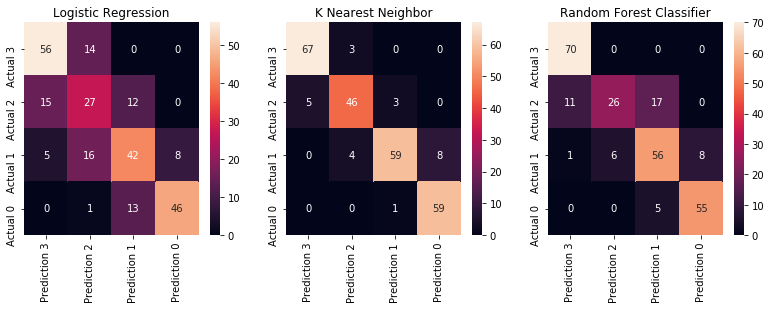

In [59]:
plt.figure(figsize=(18, 18))

plt.subplot(4,4,1)
sns.heatmap(dfLog, annot=True)
plt.title('Logistic Regression')

plt.subplot(4,4,2)
sns.heatmap(dfKNN, annot=True)
plt.title('K Nearest Neighbor')

plt.subplot(4,4,3)
sns.heatmap(dfRF, annot=True)
plt.title('Random Forest Classifier')

## Summary

Dari hasil pengujian dengan menggunakan Model Logistic Regression, KNN, Random Forest, model yang memiliki tingkat akurasi paling tinggi adalah KNN dengan score 0.905882